# Autoregressive Process
$$
  X_{t} = Z_{t} + \phi_{1}X_{t-1} + \phi_{2}X_{t-2} ... + \phi_{p}X_{t-p}
$$ 

## Difference between MA(q) and AR(p) process

### Conceptually: <br>
<b>MA Model:</b> The MA model assumes that the current value of a time series is a linear combination of past white noise error terms (random shocks) and possibly a constant term. It captures short-term dependencies and fluctuations.

<b>AR Model:</b> The AR model assumes that the current value of a time series is a linear combination of its past values, rather than error terms. It captures the autoregressive relationships within the time series.

### Dependency Structure: <br>
<b>MA Model:</b> The MA model captures short-term dependencies by incorporating past error terms. The order of the model (MA(q)) indicates how many past error terms are included.

<b>AR Model:</b> The AR model captures the autoregressive dependencies by incorporating past values of the time series itself. The order of the model (AR(p)) indicates how many past values are included.

### Interpretation: <br>
<b>MA Model:</b> In the MA model, the coefficients represent the contributions of the past error terms to the current value. The sign and magnitude of the coefficients indicate the direction and strength of the impact.

<b>AR Model:</b> In the AR model, the coefficients represent the impact of the past values of the time series on the current value. They indicate how the past values influence the present value.

### Stationarity: <br>
<b>MA Model:</b> The MA model assumes stationarity of the time series, which means that the mean, variance, and autocovariance structure remain constant over time.

<b>AR Model:</b> The AR model can handle both stationary and non-stationary time series. For non-stationary data, differencing is often applied to make it stationary before fitting the AR model (known as ARIMA model).

### Model Selection: <br>
<b>MA Model:</b> The order selection for the MA model (MA(q)) is often determined by examining the autocorrelation function (ACF) and partial autocorrelation function (PACF) plots.

<b>AR Model:</b> The order selection for the AR model (AR(p)) is typically determined by examining the PACF plot.


## Using PACF to determine order

Since AR process assumes that the current value of a time series is a linear combination of its past values, this means that if we were to compare the 2 instances of a time series at different timestamp, they are not a apple to apple comparison like in the MA(q) process, this is because we have yet to account for the effects of intermediate lags. Or basically the period between the 2 lags we are comparing. 

Example, if the 2 lags we are comparing is t=1 and t=5, we need to exclude the effect of t=2,t=3,t=4. and PACF can help us achieve this. 

Codes shown below are taken from the following tutorial video: <br>
https://www.youtube.com/watch?v=4JPfN1Cl5wg 

In [23]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.regression.linear_model import yule_walker
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

In [24]:
plt.rcParams['figure.figsize'] = (10, 7.5)

## Simulate AR(2) Process 
 
$ y_t = 0.33y_{t-1} + 0.5y_{t-2} $

In [25]:
# initialise the coefficient for both the AR and MA process
ar2 = np.array([1, 0.33, 0.5])
ma2 = np.array([1, 0, 0])

In [26]:
AR2_process = ArmaProcess(ar2, ma2).generate_sample(nsample=1000)

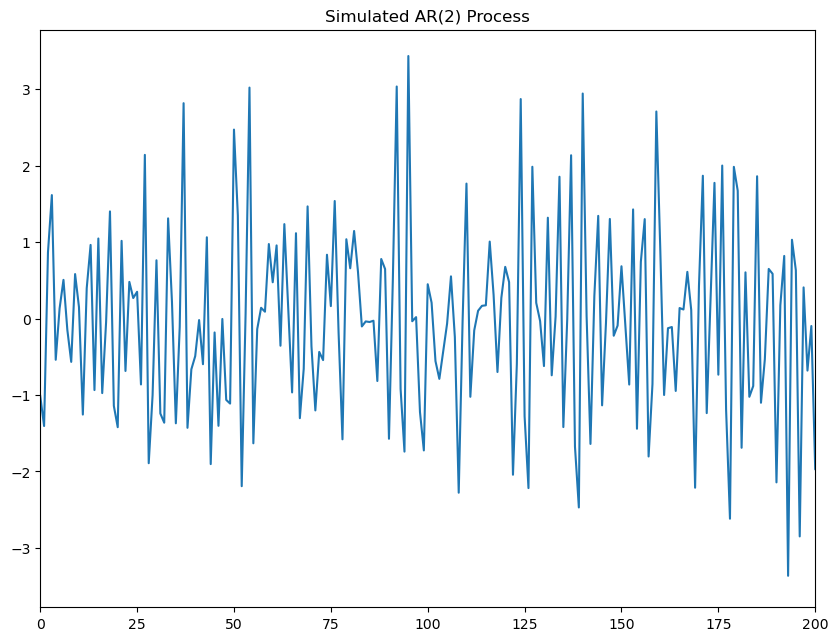

In [27]:
plt.plot(AR2_process)
plt.title('Simulated AR(2) Process')
plt.xlim(0, 200)
plt.show()

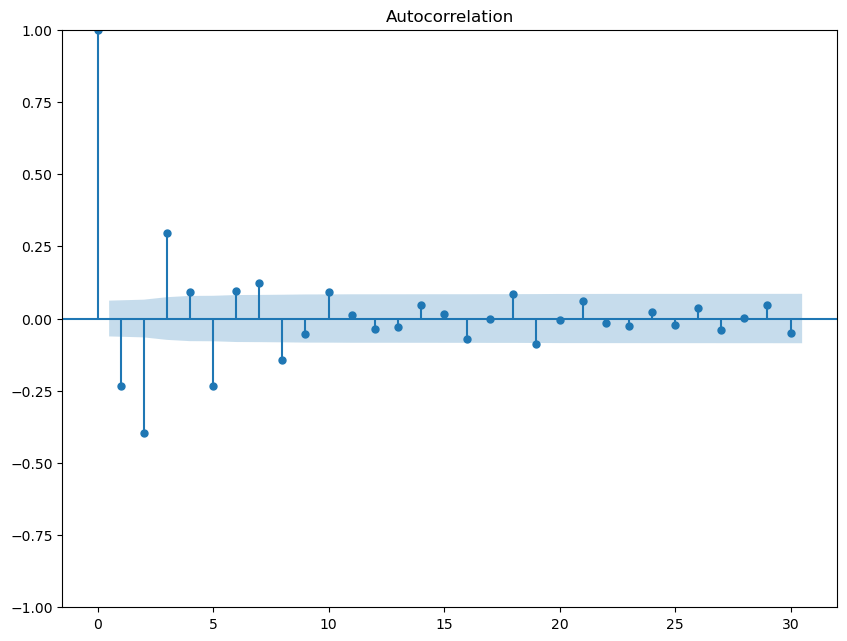

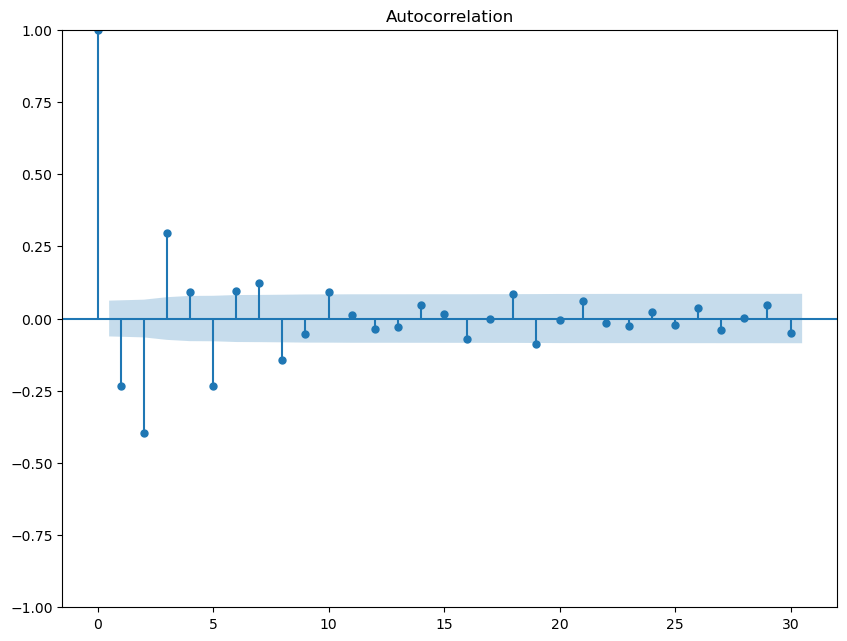

In [28]:
plot_acf(AR2_process)

C:\Users\Jerome Seah\anaconda3\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


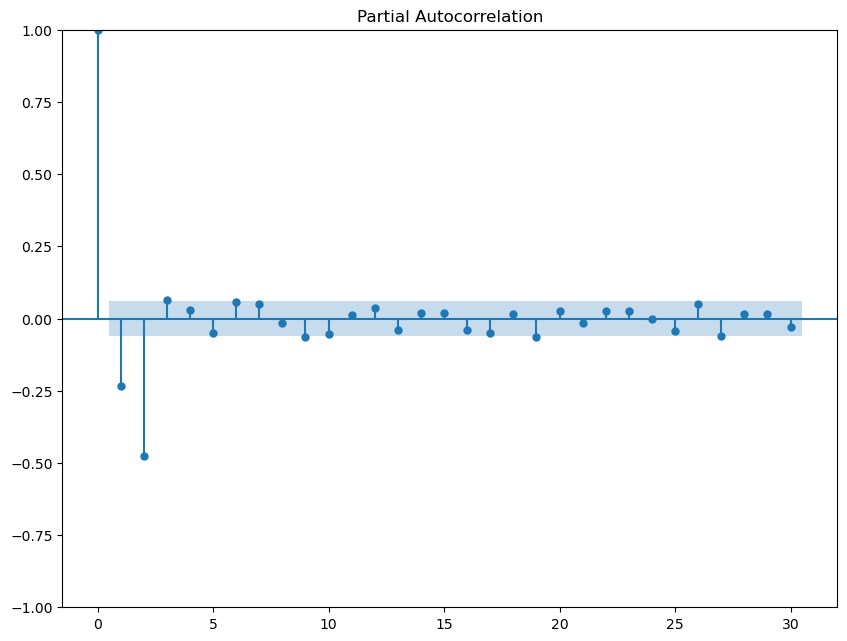

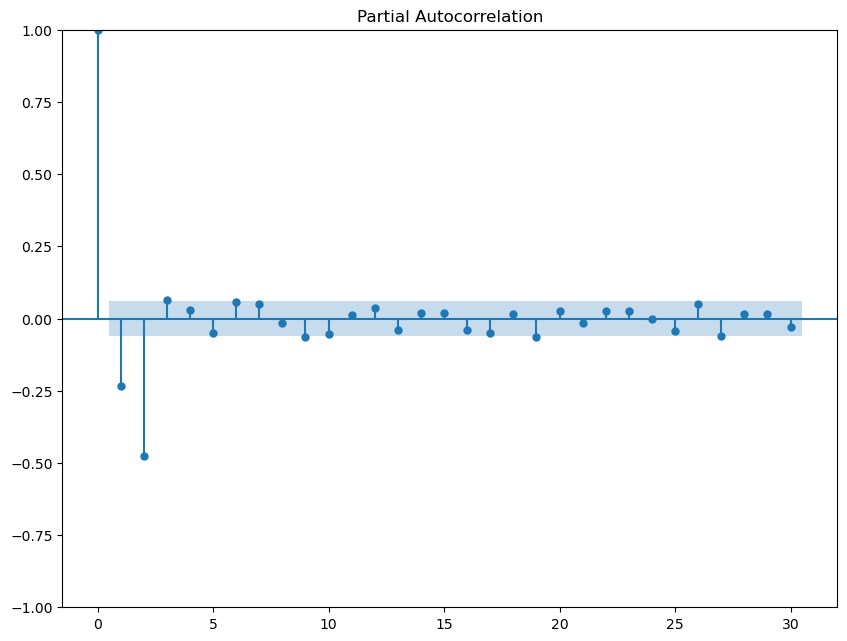

In [29]:
plot_pacf(AR2_process)

In [30]:
# model back the data to see if we can get back the coefficient using Yule-walker
rho, sigma = yule_walker(AR2_process, 2, method='mle') # Order 2
print(f'rho:{-rho}') # have to be negative, because coefficients are given in negative
print(f'sigma:{sigma}')

rho:[0.3467468 0.4762813]
sigma:1.01505687847718


# Simulate AR(3) Process

$ y_t = 0.33y_{t-1} + 0.5y_{t-2} + 0.07y_{t-3} $

In [31]:
ar3 = np.array([1, 0.33, 0.5, 0.07])
ma3 = np.array([1, 0, 0, 0])

In [32]:
AR3_process = ArmaProcess(ar3, ma3).generate_sample(nsample=1000)

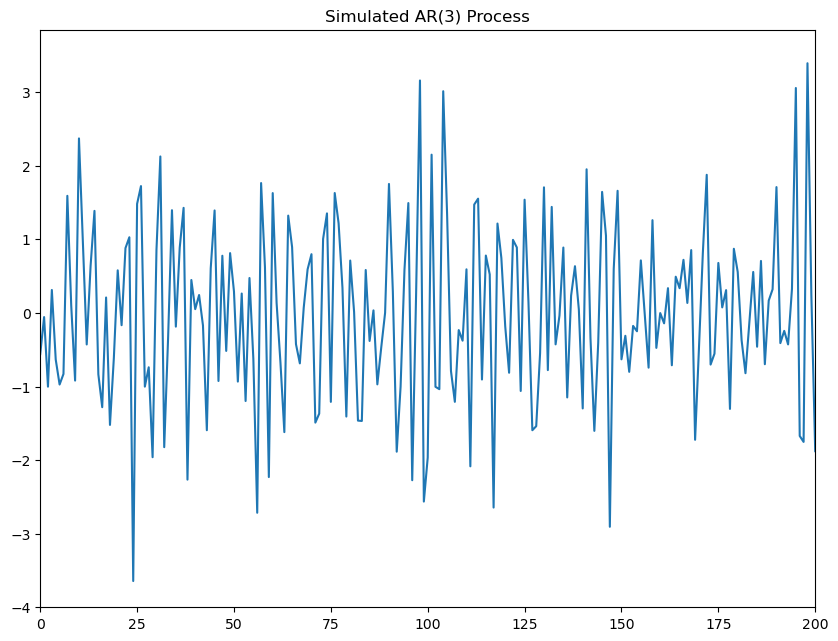

In [33]:
plt.plot(AR3_process)
plt.title('Simulated AR(3) Process')
plt.xlim(0, 200)
plt.show()

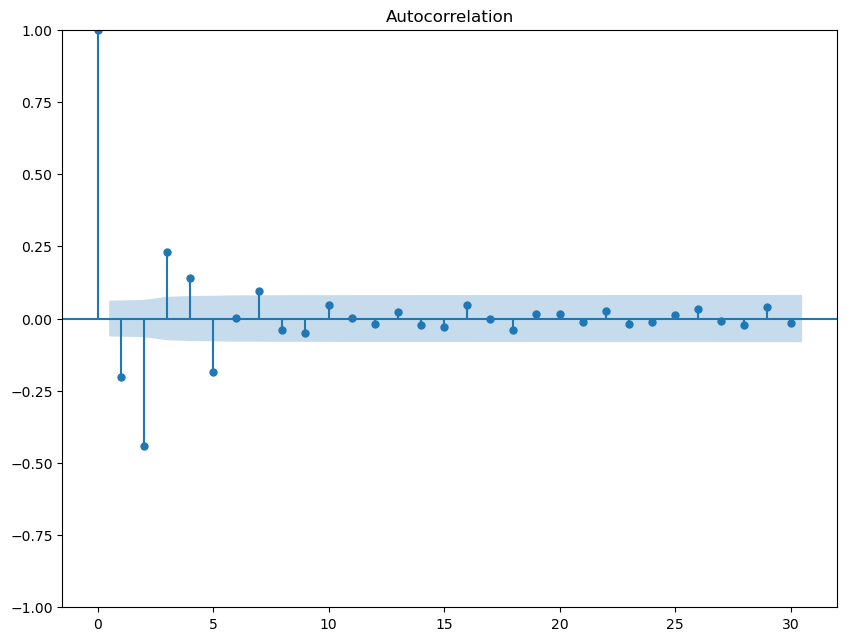

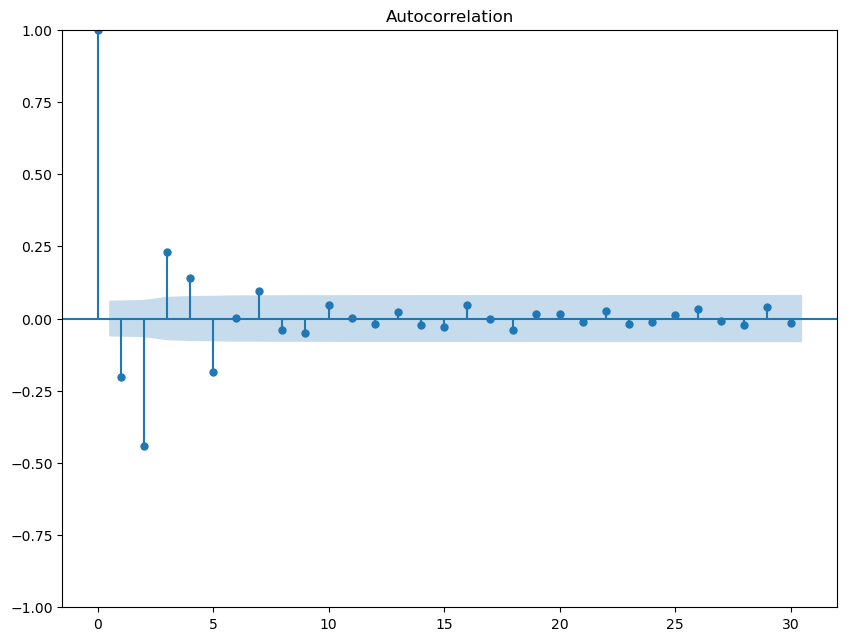

In [34]:
plot_acf(AR3_process)

C:\Users\Jerome Seah\anaconda3\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


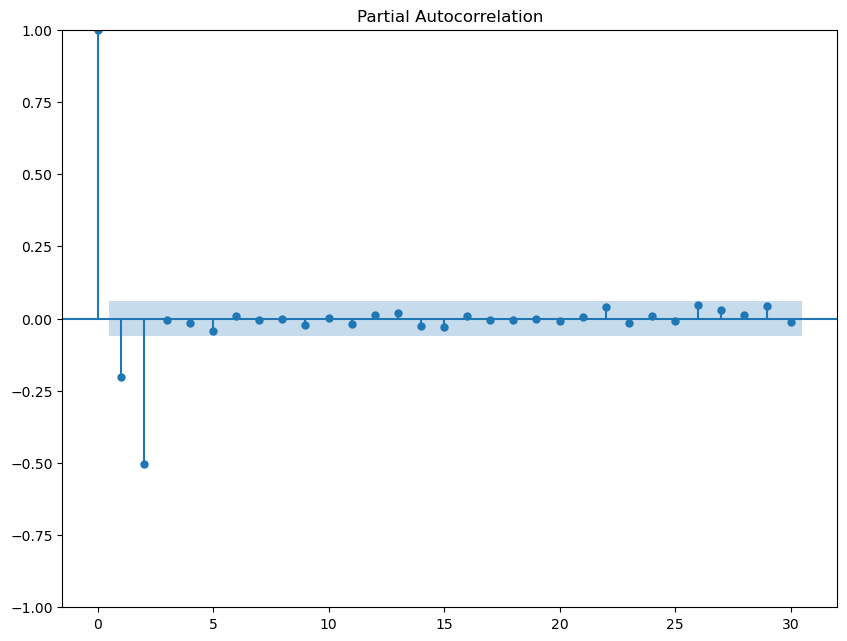

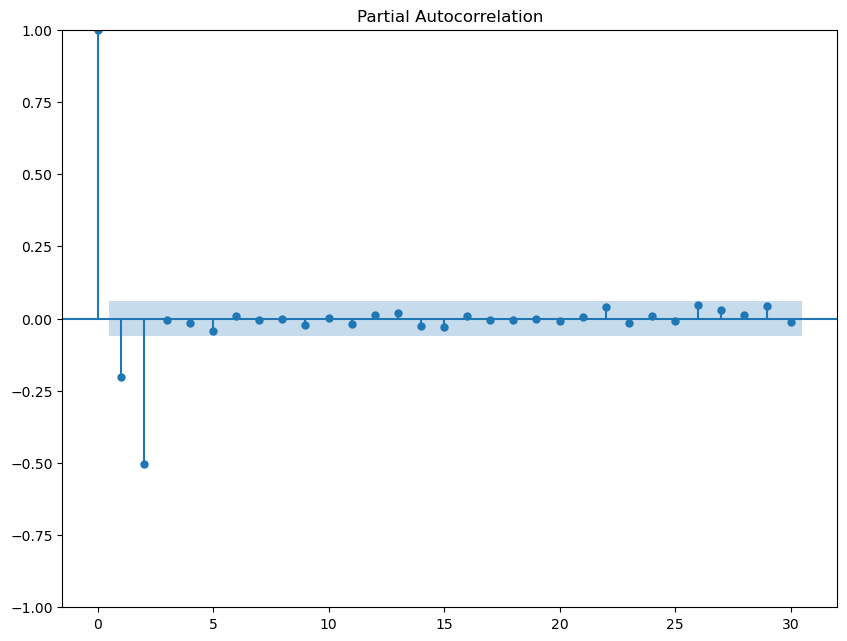

In [35]:
plot_pacf(AR3_process)

In [36]:
# model back the data to see if we can get back the coefficient using Yule-walker
rho, sigma = yule_walker(AR3_process, 3, method='mle') # Order 2
print(f'rho:{-rho}') # have to be negative, because coefficients are given in negative
print(f'sigma:{sigma}')

rho:[0.30606579 0.50390617 0.00603131]
sigma:0.9944672171846941


# Mini Project: Model Johnson&Johnson Quarterly Earnings Per Share (EPS)

In [37]:
data = pd.read_csv('jj.csv')
data.head()

,date,data
0,1960-01-01,0.71
1,1960-04-01,0.63
2,1960-07-02,0.85
3,1960-10-01,0.44
4,1961-01-01,0.61


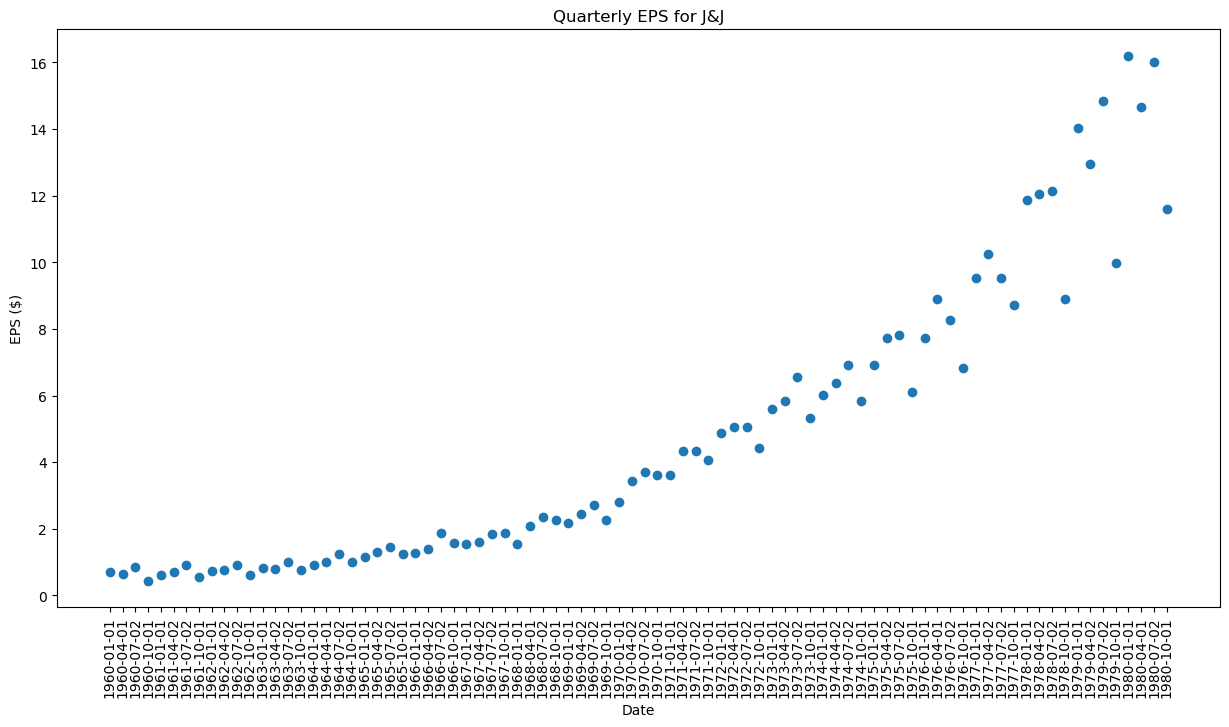

In [38]:
plt.figure(figsize=[15, 7.5])
plt.scatter(data['date'], data['data'])
plt.title('Quarterly EPS for J&J')
plt.ylabel('EPS ($)')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.show()

In [39]:
# Take the log-difference to make the data stationary

data['data'] = np.log(data['data'])
data['data'] = data['data'].diff()
data = data.drop(data.index[0])

# Log difference of earnings per share
data.head()

,date,data
1,1960-04-01,-0.119545
2,1960-07-02,0.299517
3,1960-10-01,-0.658462
4,1961-01-01,0.326684
5,1961-04-02,0.123233


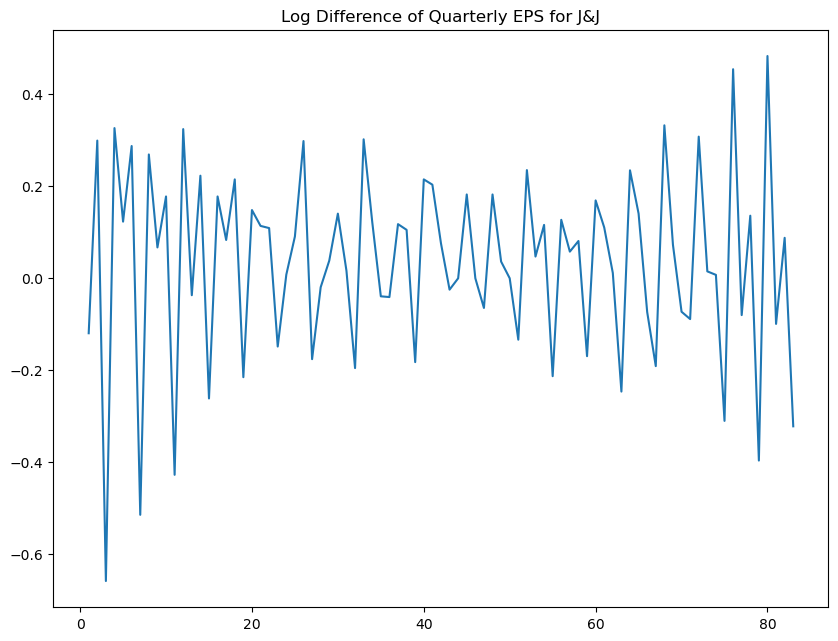

In [40]:
plt.plot(data['data'])
plt.title('Log Difference of Quarterly EPS for J&J')
plt.show()

In [41]:
# Stationary is no trend and same variance across different timestamp. But here, it is difficult to determine that
# variance is the same visually
# We need to use the ad-fuller test
# Null hypothesis - Dataset is not Stationary
# If Ad-fuller test p < 0.05, we can reject the null hypothesis and assume that the dataset is stationary

ad_fuller_result = adfuller(data['data'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -4.317043945811826
p-value: 0.0004149731404440838


The P-value of 0.0004 is smaller than 0.05 significant level. Hence, we can reject the null hypothesis that this time series is not stationary and assume that the null series is stationary

C:\Users\Jerome Seah\anaconda3\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


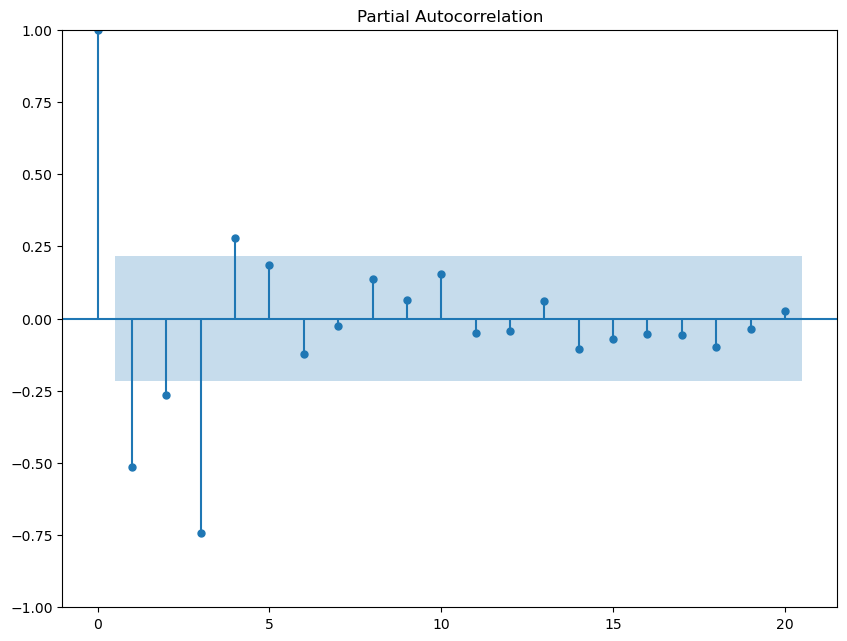

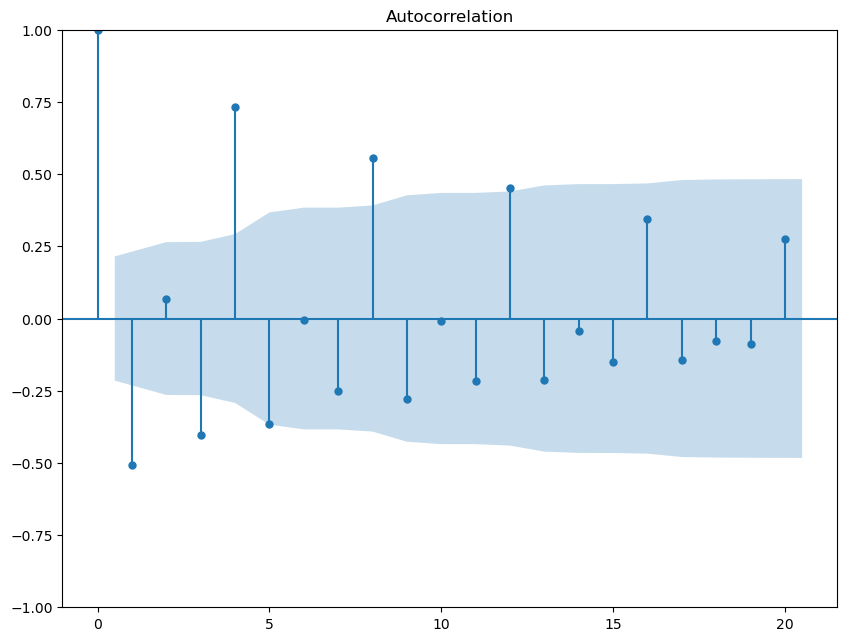

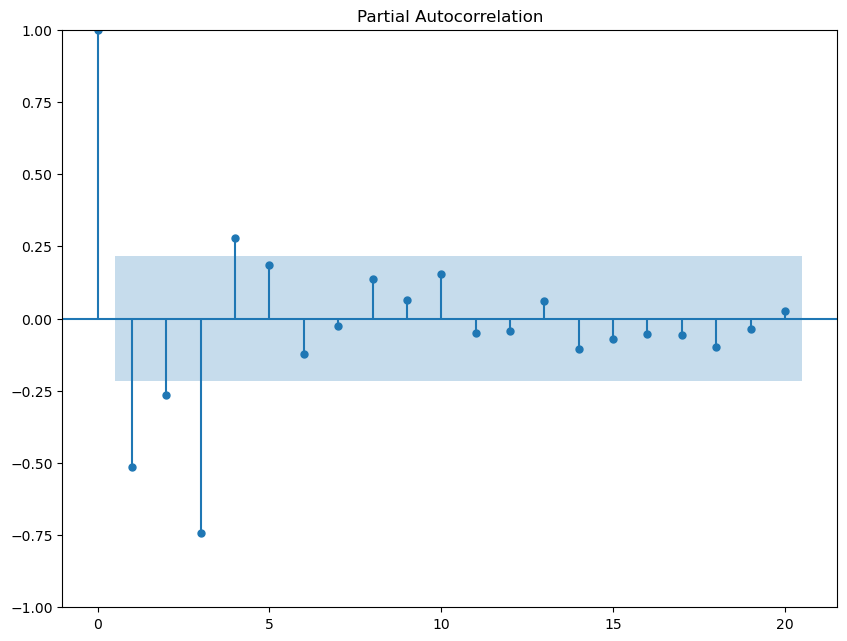

In [42]:
plot_acf(data['data'])
plot_pacf(data['data'])

So, we can conclude that this may be a AR(4) process. This means that a Autoregressive of order 4 AR(4) process is a good approximation to modelling the earnings per share of Johnson&Johnson

In [43]:
# Yule-walker to get coefficient
rho, sigma = yule_walker(data['data'], 4)
print(f'rho: {-rho}')
print(f'sigma: {sigma}')

# We figured out the coefficient for a AR(4) model, that models the quarterly earnings per share of J&J

rho: [ 0.63642644  0.5364386   0.50578018 -0.27991345]
sigma: 0.11132979178317175


$ y_t = 0.64y_{t-1} + 0.54y_{t-2} + 0.51y_{t-3} - 0.28y_{t-4} $